In [16]:
from sportsipy.nfl.teams import Teams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import math
import numpy as np
%matplotlib inline

In [32]:
names = []
wins = []
points = []
for team in Teams("2022"):
    names.append(team.abbreviation)
    wins.append(team.wins)
    points.append(team.points_difference)
df = pd.DataFrame({"Team" : names, "Wins" : wins, "Points Diff" : points})

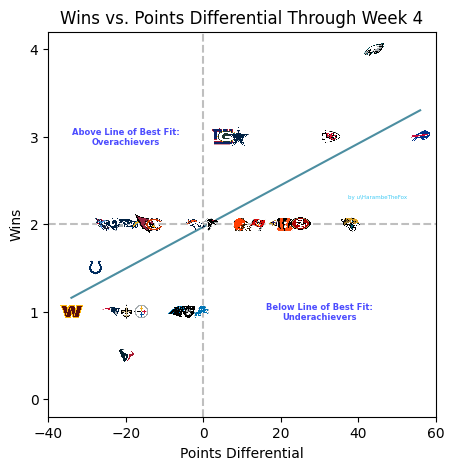

In [50]:
dimensions = (5,5)
fig, ax = plt.subplots(figsize = dimensions)
z = np.polyfit(x = df.loc[:, "Points Diff"], y = df.loc[:, "Wins"], deg = 1)
p = np.poly1d(z)
df["Trendline"] = p(df.loc[:, "Points Diff"])

graph = sns.scatterplot(ax = ax, data = df, x = "Points Diff", y = "Wins", s = 0)
graph2 = sns.lineplot(ax = ax, data = df, x = "Points Diff", y = "Trendline", color = "#4c8ea1")
#Image function, iterates through team name in data frame and adds team image at its coordinates. 
def images(dfname, xcol, ycol, graph_name):
    for team in dfname["Team"]:
        if team == "CLT" or team == "HTX":
            pass
        else:
            arr_img = plt.imread(team + ".png")
            imagebox = OffsetImage(arr_img, zoom = 0.02)
            ab = AnnotationBbox(imagebox, [(dfname.loc[dfname[dfname["Team"]==team].index.values][xcol]), 
                                        (dfname.loc[dfname[dfname["Team"]==team].index.values][ycol])], frameon = False)
            graph_name.add_artist(ab)
#add images
images(df, "Points Diff", "Wins", graph)

#add colts and texans
colts = plt.imread("CLT.png")
coltsimbox = OffsetImage(colts, zoom = 0.02)
ab_colts = AnnotationBbox(coltsimbox, [(df.loc[df[df["Team"] == "CLT"].index.values]["Points Diff"]),
                                     0.5 + df.loc[df[df["Team"] == "CLT"].index.values]["Wins"]], frameon = False)
graph.add_artist(ab_colts)

texans = plt.imread("HTX.png")
texansimbox = OffsetImage(texans, zoom = 0.02)
ab_texans = AnnotationBbox(texansimbox, [(df.loc[df[df["Team"] == "HTX"].index.values]["Points Diff"]),
                                     0.5 + df.loc[df[df["Team"] == "HTX"].index.values]["Wins"]], frameon = False)
graph.add_artist(ab_texans)

#annotations
plt.axvline(x = 0, ls = "--", color = "gray", alpha = 0.5)
plt.axhline(y = 2, ls = "--", color = "gray", alpha = 0.5)
ax.set_title("Wins vs. Points Differential Through Week 4")
plt.xlim(-40, 60)
plt.xlabel("Points Differential")
plt.yticks([0, 1, 2, 3, 4])
plt.text(-20, 3, "Above Line of Best Fit:\nOverachievers", horizontalalignment = "center", verticalalignment = "center", color = "blue", weight = "semibold", size = 6, alpha = 0.7)
plt.text(30, 1, "Below Line of Best Fit:\nUnderachievers", horizontalalignment = "center", verticalalignment = "center", color = "blue", weight = "semibold", size = 6, alpha = 0.7)
plt.text(45, 2.3, "by u\HarambeTheFox", horizontalalignment = "center", color = "#42cbf5", size = 4, )
plt.savefig("Wins vs. Points Differential NFL Through Week 4.png", dpi = 500)
